# Preprocessing + Otsu testing using the Dice score algorithm!

##UPDATES
**Otsu 1.0 (26.05.2022):**
- Works on the N2DH-GOWT1 dataset:
- with median filter (sigma = 11): 'foreground dice 0.8647383598765342', 'background dice 0.9904713195293032', sample size = 1
- without median filter: foreground dice 0.742, sample size = 1 picture


In [3]:
#Packages
%pylab
%matplotlib inline
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

Using matplotlib backend: <object object at 0x000001DC111F2ED0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
#Load all new functions

#Dice
def b_dice(x): # POSITIVE PIXELS = BACKGROUND x=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #gt picture x
    pt = tresholded[x] #post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]==0:
            if pt[x,y]==0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]==0:
                fp+=1
            else:
                tn+=1 #not really needed, but does not influence the runtime
    b_dsc= 2*tp/(2*tp+fn+fp)
    return b_dsc
    print(b_dsc)

def f_dice(x): # POSITIVE PIXELS = FOREGROUND
    gt = ground_truth[x] 
    pt = tresholded[x] 
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]!=0:
            if pt[x,y]!=0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]!=0:
                fp+=1
            else:
                tn+=1 
    f_dsc= 2*tp/(2*tp+fn+fp)
    return f_dsc
    print(f_dsc)

#Otsu
def otsu_thresholding(img):
    n, bins, patches = plt.hist(img.flatten(),log = 'False')
    
    thres = 0
    copy = img.copy()
    bcv = list()
    for i in range(0,len(n)):
        bclv = 0
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0
        for j in range(0,i+1):
            w0_sum += n[j]
            mean_sum0 += bins[j]*n[j]
            

        w0 = w0_sum / sum(n)    
        mean_0 = mean_sum0 / sum(n[0:i+1])
        
        for m in range(0,i+1):
            v0_sum += ((bins[m]-mean_0)** 2) * n[m]
        
        v0 = v0_sum / sum(n[0:i+1])
        
        for k in range(i+1, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += bins[k]*n[k]
            
        w1 = w1_sum / sum(n)
        mean_1 = mean_sum1 / sum(n[i+1:len(n)])

        for s in range(i+1,len(n)):
            v1_sum += ((bins[s]-mean_1) ** 2) * n[s]
        
        v1 = v1_sum / sum(n[i+1:len(n)])
        bclv = (w0 * v0) + (w1 * v1)
        bcv.append(bclv)

    optimal_thres = min(bcv)
    l = 0
    while l < len(bcv):
        if bcv[l] == optimal_thres: thres = bins[l]
        l += 1


    for o in ndindex(copy.shape):
        if copy[o] < (thres): 
            copy[o] = 0
        else:
            copy[o] = 255

    figure()  
    imshow(copy, 'gray')
    colorbar()

    return copy 
    



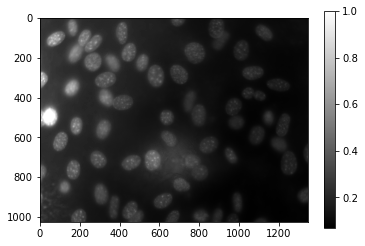

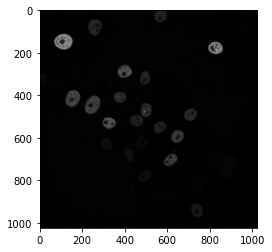

In [72]:
#Images
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-44.png")
figure()  
imshow(img_1, 'gray')
colorbar()


img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif") 
figure()  
imshow(img_2, 'gray')

img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 
gt_3 = imread(r"data\Otsu_data\N2DL-HeLa\gt\man_seg13.tif")

gt_1 = imread(r"data\Otsu_data\NIH3T3\gt\44.png")
gt_2 = imread(r"data\Otsu_data\N2DH-GOWT1\gt\man_seg39.tif")

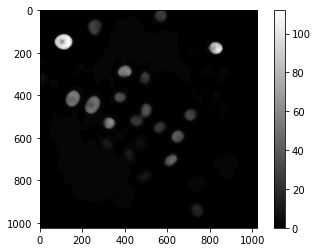

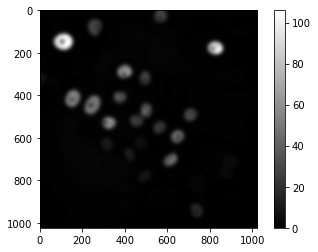

In [60]:
#Preprocessing
median1 = scipy.ndimage.median_filter(img_2, 30)
figure()
imshow(median1, 'gray')
colorbar()

import scipy.ndimage
gauss1 = scipy.ndimage.gaussian_filter(img_2,9)
figure()
imshow(gauss1, 'gray')
colorbar()

C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:88: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:93: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


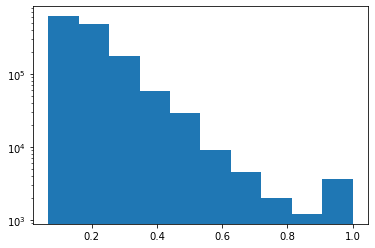

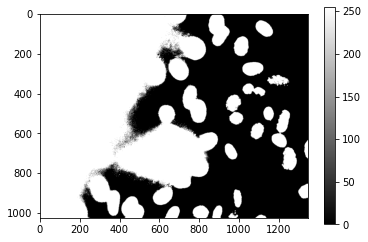

In [14]:
#Otsu
pt = otsu_thresholding(img_1)


C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:88: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:93: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


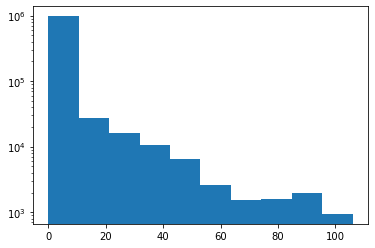

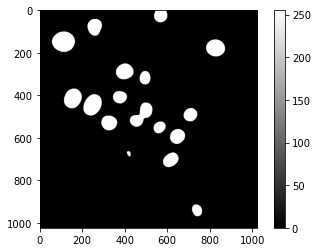

In [19]:
pt_4 = otsu_thresholding(gauss1)

C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:88: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:93: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


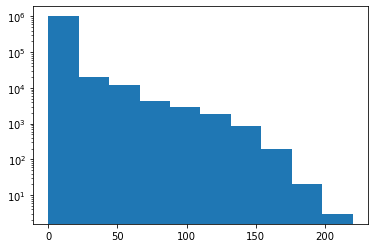

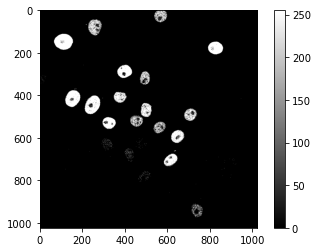

In [12]:
pt_2 = otsu_thresholding(img_2)


C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:88: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:93: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


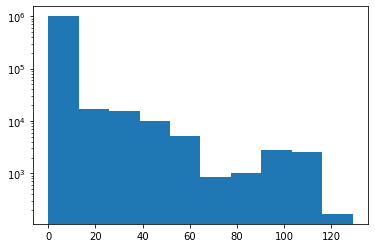

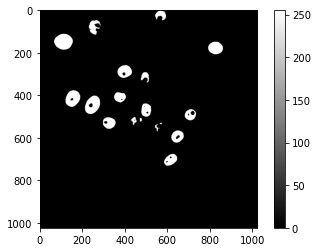

In [13]:
pt_3 = otsu_thresholding(median1)


In [64]:
def stretch(x):
    intensities = []
    img = copy(x)
    h = img.shape[0]
    w = img.shape[1]
    for x, y in np.ndindex((h,w)):
        intensities.append(img[x,y])
    img_max = max(intensities)
    img_min = min(intensities)
    for a, b in np.ndindex((h,w)):
        img[a,b] = (img[a,b]-img_min)*255/(img_max-img_min)
    return img 

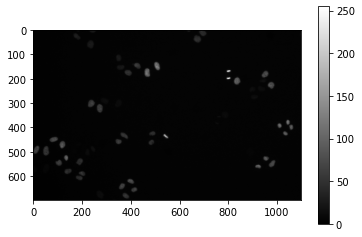

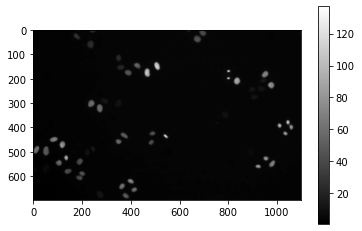

In [76]:
stretch1 = stretch(img_3)
figure()
imshow(stretch1, 'gray')
colorbar()

median2 = scipy.ndimage.median_filter(stretch1, 11)
figure()
imshow(median2, 'gray')
colorbar()


C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:88: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:93: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


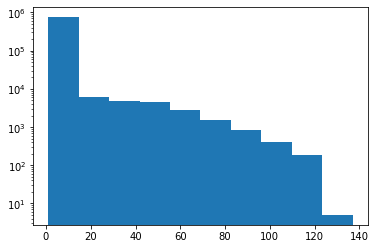

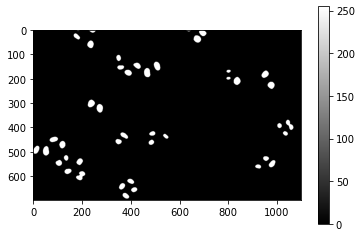

In [77]:
pt_5 = otsu_thresholding(median2)


C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:88: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\marie\AppData\Local\Temp\ipykernel_21064\4245390443.py:93: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


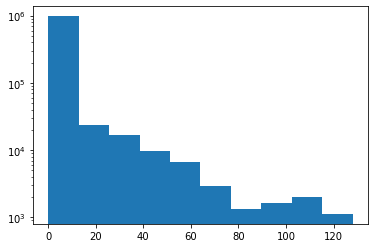

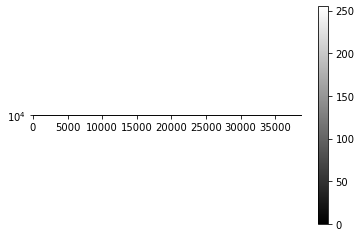

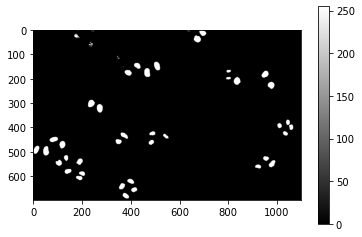

In [73]:
pt_6 = otsu_thresholding(gauss2)
pt_7 = otsu_thresholding(img_3)

In [78]:
#Dice score

tresholded = [pt, pt_5]
ground_truth = [gt_1, gt_3]
dsc = ['foreground dice ' + str(f_dice(1)), 'background dice ' + str(b_dice(1))]
print(dsc)



['foreground dice 0.7954437963108939', 'background dice 0.9930300767631622']
